<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/ibm_modulo_4_data_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en Inteligencia Artificial Aplicada**

## **A01794067**
## **Jose Antonio Mendoza Castro**
## *Análisis de Datos Python*

## **Ciencia y analitica de datos**

## **Dra. Maria de la Paz Rico**

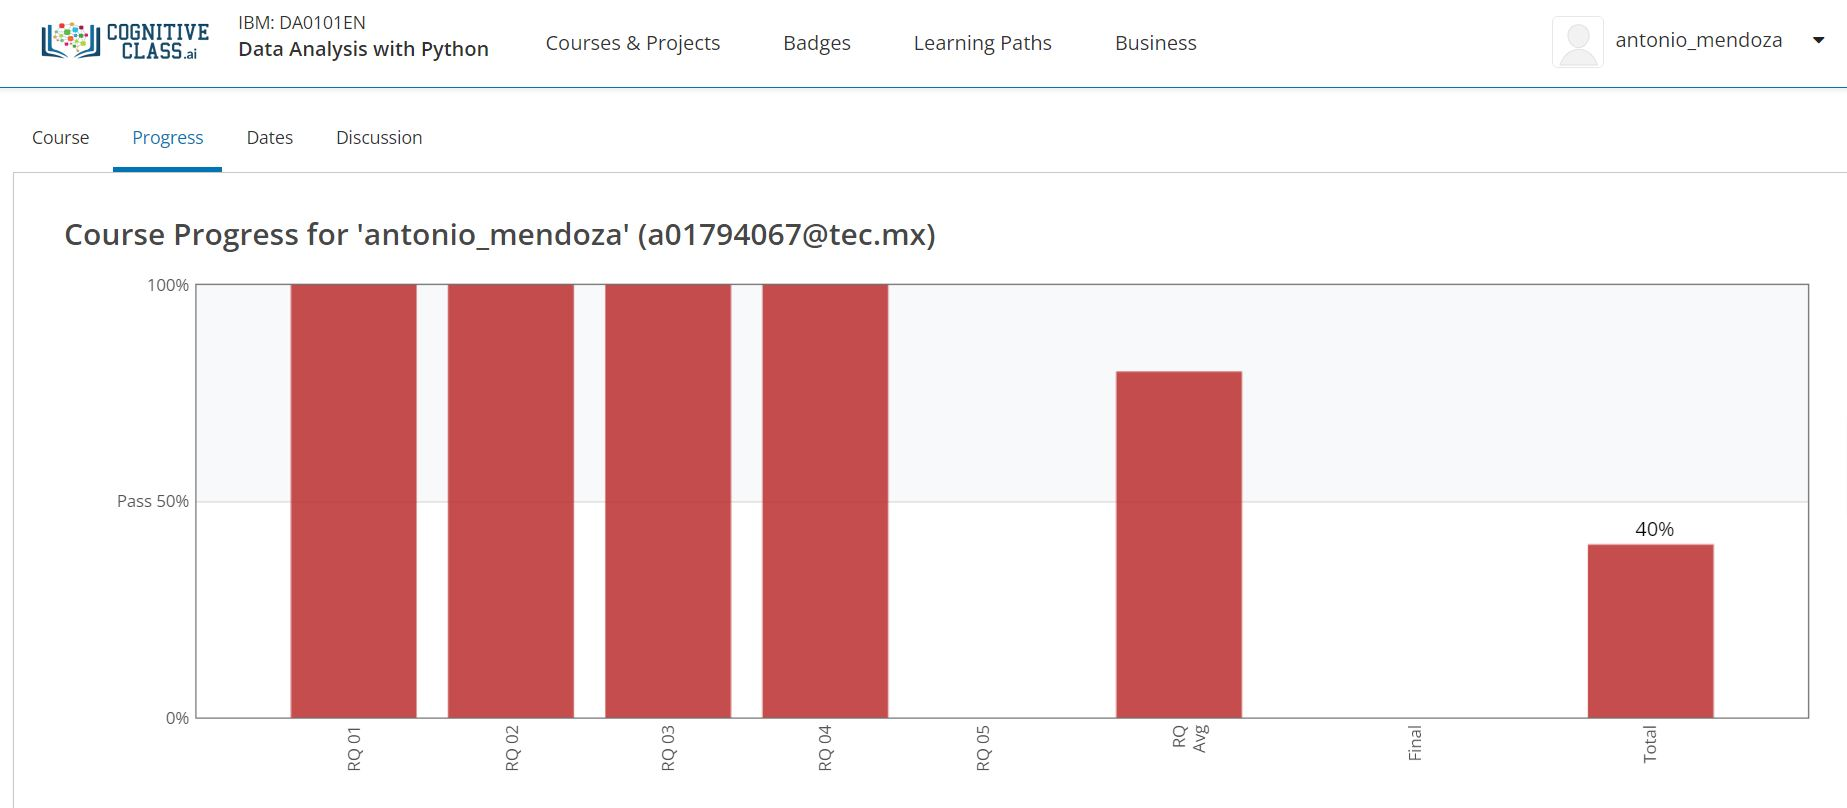

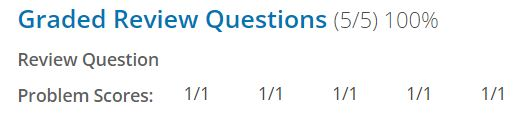

### **Desarrollo de modelos**

* Un modelo puede ser pensado como ecuación matemátca usada para predicir uno o varios valores dados.

* Relacionando una o más variables independientes a variables dependientes.

### Regresión lineal simple y múltiple

* La regresión lineal simple se refiere a la relación entre dos variables, una variable independiente y una dependiente. Está conformada por una constante y una pendiente. Cuando se sustituye un valor en la variable independiente obtenemos un valor estimado llamado predicción. A la diferencia entre nuestro valor estimado y el real le llamamos ruido. 

In [22]:
#en Python utilizamos la librería 'sklearn' para trabajar con regresiones lineales simples
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
#adquisicion de los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [3]:
#leemos el archivo omitiendo los 'headers' con el parametro 'header' igual a None
df = pd.read_csv(url, header = None)

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
#ponemos nombre a cada columna de acuerdo a la descripcion de los datos
df.columns = headers

In [6]:
#convertimos la variable precio a 'float'
#como tenemos datos faltantes identificados con el signo '?', primero obtenemos la media omitiendo esos datos
mean_price_tmp = df[df['price'] != '?']['price'].astype(int)
mean_price = np.mean(mean_price_tmp)
#una vez obtenida la media replazamos '?' por la media
df['price'] = df['price'].replace('?', mean_price) 
#finalmente convertimos toda la columna a 'float'
df['price'] = df['price'].astype(float) 

In [34]:
X = df[['highway-mpg']].copy()
y = df['price']

In [25]:
#creamos un objeto desde el 'constructor'
lm = LinearRegression()

In [27]:
lm.fit(X, y)

LinearRegression()

In [28]:
#con lo anterior podemos obtener una predicción
yhat = lm.predict(X)

In [11]:
#también podemos ocupar los siguientes atributos
#para el intercepto
lm.intercept_

37470.66014138312

In [12]:
#para el coeficiente o pendiente
lm.coef_

array([-789.02661986])

In [13]:
#también lo podemos hacerlo para un modelo de regresión lineal múltiple
#reemplazamos los valores faltantes en la variable 'horsepower'
mean_hp_tmp = df[df['horsepower'] != '?']['horsepower'].astype(int)
mean_hp = np.mean(mean_hp_tmp)

df['horsepower'] = df['horsepower'].replace('?', mean_price) 
df['horsepower'] = df['horsepower'].astype(int)

In [14]:
#tomaremos cuatro regresores para el modelo
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].copy()

In [15]:
lm.fit(z, y)

LinearRegression()

In [16]:
yhat = lm.predict(z)

In [17]:
#también podemos ocupar los mismos atributos usados en la regresión simple
#para el intercepto
lm.intercept_

-6498.609211793937

In [18]:
#para el coeficiente o pendiente
lm.coef_

array([  -0.30635746,    3.53540121,  112.64181011, -115.54599117])

### Evaluación del modelo usando visualización

(0.0, 48140.148960836035)

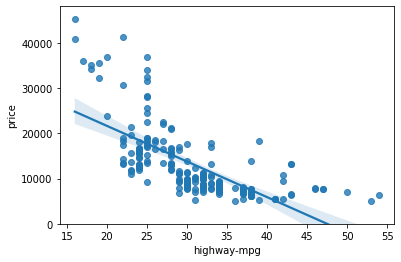

In [23]:
#una forma sencilla de hacer una visualización de una regresión es a través de la librería 'Seaborn'
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0, )

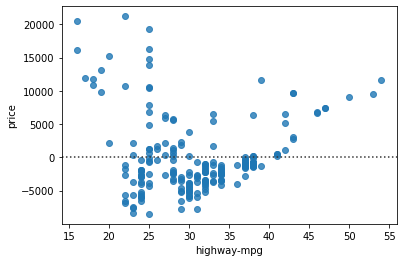

In [24]:
#por otra parte podemos analizar los residuos de nuestro modelo, con lo cual podemos analizar si se comportan de manera lineal o no
sns.residplot(x = 'highway-mpg', y = 'price', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


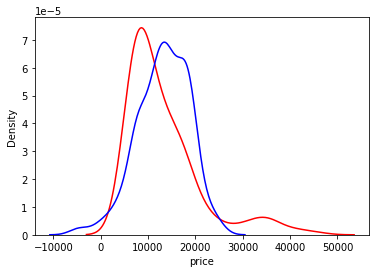

In [32]:
#por otra parte podemos comparar nuestras predicciones con respecto a nuestros valores reales por medio de gráficas de distribución
ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')

sns.distplot(yhat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.show()

### Regresión polinómica y pipelines

En ocasiones cuando la relación entre nuestras variables independientes y dependiente no es lineal podemos cambiar la forma funcional de nuestro modelo para analizar qué forma se ajusta mejor a nuestros datos.

In [36]:
X = df['highway-mpg']
y = df['price']

In [37]:
#por ejemplo podemos ocupar 'Numpy' para probar distintos grados sobre nuestro modelo
f = np.polyfit(X, y, 3)
p = np.poly1d(f)

In [38]:
print(p)

        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


In [39]:
#por otra parte podemos simplificar nuestro código por medio de un pipeline
#con el cual podemos realizar preprocesamiento y modelar nuestros datos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(degree = 2)),
         ('model', LinearRegression())]

pipe = Pipeline(input)

In [41]:
X = df[['highway-mpg']].copy()
y = df['price']

In [42]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [43]:
yhat = pipe.predict(X)

### Medidas para la evaluación en una muestra

In [44]:
X = df[['highway-mpg']].copy()
y = df['price']

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X, y)

LinearRegression()

In [47]:
#por ejemplo a través de 'sklearn' podemos obtener la R^2 de nuestro modelo, con la cual podemos evaluar que tan bien ajustado está, esta métrica está entre un valor de 0 y 1
lm.score(X, y)

0.47682578947968446

### Predicción y toma de decisiones

Una vez realizado un modelo debemos considerar distintos puntos:

*   Realizar visualizaciones
*   Analizar los residuos del modelo
*   Obtener métricas para evaluar el modelos
*   Verificar que los resultados hacen sentido
*   Asimismo, analizar si los resultados obtenidos sean de utilidad